# Linear Regression with Multiple Variables

### Multiple Features

Consider the housing price example from week 1. In that example, there was one variable, x, which represented the size in sq ft of the house. The x variable was used to predict the price (y) of the home. What if there were other variables contributing to the price of the house (e.g. # of bedrooms, # of floors, and the age of the home in years).

Notation:
- $n$ = number of features
- $x^{(i)}$  = input (features) of the $i^{th}$ training example. For example, $x^{(2)} = \begin{bmatrix} 1416 \\ 3 \\ 2 \\ 40 \end{bmatrix}$ Which is a vector of feature values for the 2nd training example.
- $x^{(i)}_j$ = value of the feature *j* of the $i^{th}$ training example.

What is the new hypothesis for multiple features?
- the previous hypothesis for univariant linear regression was $ h_\mathsf{\theta}(x) = \mathsf{\theta_0}+\mathsf{\theta_1x}$
- $ h_\mathsf{\theta}(x)=\mathsf{\theta_0}+\mathsf{\theta_1x_1}+\mathsf{\theta_2x_2}+\mathsf{\theta_3x_3}+\mathsf{\theta_4x_4}$
- The above formula represents the summation of n features. In the housing example, there are 4 features. it can more formally/generally be written as $h_\mathsf{\theta}(x)=\mathsf{\theta_0}+\mathsf{\theta_1x_1}+\mathsf{\theta_2x_2}+...+\mathsf{\theta_nx_n}$
    - for convenience of notation, $x_0 = 1$ or $x^{(i)}_0 = 1$
    - $x = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{bmatrix}$ x is therefore a 0-index feature vector.
    - $\mathsf{\theta} = \begin{bmatrix} \mathsf{\theta_0} \\ \mathsf{\theta_1} \\ \mathsf{\theta_2} \\ \mathsf{\theta_3} \end{bmatrix}$ or the parameters, can also be written as a vector
- $ h_\mathsf{\theta}(x)= \mathsf{\theta^{T}x}$
    - $\begin{bmatrix}\mathsf{\theta_0} &\mathsf{\theta_1} &\mathsf{\theta_n}\end{bmatrix}\begin{bmatrix} x_0 \\ x_1 \\ x_n \end{bmatrix} = h_\mathsf{\theta}(x)=\mathsf{\theta_0x_0}+\mathsf{\theta_1x_1}+\mathsf{\theta_2x_2}+\mathsf{\theta_nx_n}$

### Gradient Descent for Multiple Variables

- Think of the parameters $\mathsf{\theta_0},\mathsf{\theta_1},...\mathsf{\theta_n}$ as $\mathsf{\theta}$ = a n+1 dimensional vector
- Cost function:
J($\mathsf{\theta}_0$ $\mathsf{\theta}_1$...$\mathsf{\theta}_n$) =  $\frac{1}{2m}$ $\sum \limits_{i=1} ^{m}(h_\mathsf{\theta}(x^i)-y^i)^2$
    - instead of writing J($\mathsf{\theta}_0$ $\mathsf{\theta}_1$...$\mathsf{\theta}_n$), J($\mathsf{\theta}$) = a function of the parameter vector theta
- Gradient descent:
    - Repeat $\mathsf{\theta}_j := \mathsf{\theta}_j -\mathsf{\alpha}\frac{\mathsf{\delta}}{\mathsf{\delta}\mathsf{\theta}_j}J(\mathsf{\theta})$
    - $\mathsf{\theta}_j := \mathsf{\theta}_j -\mathsf{\alpha}\frac{1}{m}\sum \limits_{i=1}^{m}(h_\mathsf{\theta_0}(x^{(i)})-y^{(i)})x^{(i)}_j$


### Gradient Descent in Practice I: Feature Scaling
- If you make sure that the various features are on a similar scale, then convergence via gradient descent can occur more quickly.
- E.g. $x_1 = size(0-2000ft^2)$ and $x_2 =bedrooms(1-5)$
    - the contours of the associated graph would be skewed, i.e. very tall and thin ovals because $x_1=2000$ vs $x_2=5$ represent a large difference in scale.
    - one solution would be to scale the feature values:
        - $x_1 = \frac{size(ft^2)}{2000}$
        - $x_2 = \frac{number of bedrooms}{5}$
- Ideally the idea is to get every feature into approximately a $ -1 ≤ x_i ≤ 1$ range.
- Mean normalization:
    - replace $x_i$ with $x_i - \mathsf{\mu_i}$ to make features have approximately zero mean
    - e.g. $x_1 = \frac{size-1000}{2000}$ $x_2=\frac{numberofbedrooms-2}{5}$
    - $x_1 = \frac{x_1 - \mathsf{\mu_1}}{s_1}$
    -  $\mathsf{\mu_i}$ = average value of $x_i$
    - $s_1$ = the range of the values, i.e. the max value - the min value
        - $s_1$ can also be replaced with the standard deviation value.

### Gradient Descent in Practice II: Learning Rate

- Gradient Descent: $\mathsf{\theta}_j := \mathsf{\theta}_j -\mathsf{\alpha}\frac{\mathsf{\delta}}{\mathsf{\delta}\mathsf{\theta}_j}J(\mathsf{\theta})$
    - "Debugging": How to make sure gradient descent is working correctly.
    - How to chose a learning rate $\mathsf{\alpha}$
- Example of an automatic convergence test: declare that the function has converged if $J\mathsf{\theta}$ decreases by less than $10^{-3}$ in one iteration.
- for a sufficiently small $\mathsf{\alpha}$, $J\mathsf{\theta}$ should decrease on every iteration, but if  $\mathsf{\alpha}$ is too small, gradient descent can be slow to converge.
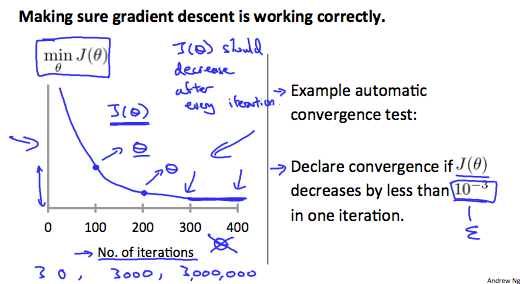

### Features and Polynomial Regression

- Consider the following example from the housing price example:
$h_\mathsf{\theta}(x)= \mathsf{\theta_0} + \mathsf{\theta_1} x frontage + \mathsf{\theta_2} x depth$
    - You are not limited to the given features, i.e. you can always create your own feature(s). For example, the **area** of the land own might be an important feature to consider when predicting the price of the house. 
    - Area: $x=frontage * depth$
    - Therefore, $h_\mathsf{\theta}(x)= \mathsf{\theta_0} + \mathsf{\theta_1}x$
-  Sometimes, a quadratic model, $\mathsf{\theta_0} + \mathsf{\theta_1}x + \mathsf{\theta_2x^2}$ may fit the data better than a linear plot. But in the housing price example, a quadratic model doesn't necessarily fit either, because eventually the parabolic curve will curve which doesn't make sense if we are evaluating the data where x = size and y = price (the larger the house would usually mean a larger price).
- A cubic model might also work: $\mathsf{\theta_0} + \mathsf{\theta_1}x + \mathsf{\theta_2x^2}+ \mathsf{\theta_3x^3}$
    - our new hypothesis would look like this:
    $\mathsf{\theta_0} + \mathsf{\theta_1}x + \mathsf{\theta_2x^2}+ \mathsf{\theta_3x^3}$ =
    $\mathsf{\theta_0} + \mathsf{\theta_1}(size) + \mathsf{\theta_2(size)^2}+ \mathsf{\theta_3(size)^3}$
    $$x_1 = (size)$$
    $$x_2 = (size)^2$$
    $$x_3 = (size)^3$$
   - when choosing features such as the ones above, feature scaling becomes increasingly important!

### Computing Parameters Analytically: Normal Equation

- Unlike gradient descent, the Normal Equation allows us to minimize/solve for $\mathsf{\theta}$ analytically
- Intuition: If $1D(\mathsf{\theta}\in \mathbb{R}$)
$$J(\mathsf{\theta})=a\mathsf{\theta^2}+b\mathsf{\theta}+c$$
- To solve for the minimum value of a quadratic equation, take the derivative of the cost function and set it equal to 0.
- However, $\mathsf{\theta}$ is more than just a scalar number but an n+1 dimensional parameter vector, so $1D(\mathsf{\theta}\in \mathbb{R^{n+1}})$
$$J(\mathsf{\theta_0},\mathsf{\theta_1},....\mathsf{\theta_m})=\frac{1}{2m}\sum \limits_{i=1} ^{m}(h_\mathsf{\theta}(x^i)-y^i)^2$$
$$\frac{\mathsf{\delta}}{\mathsf{\delta}\mathsf{\theta_j}}J(\mathsf{\theta})= ... = 0$$
- Solve for $\mathsf{\theta_0},\mathsf{\theta_1},...\mathsf{\theta_n}$
- Consider the following matrix of data features for housing prices (the first column is the $x_0$ value of 1. y is a matrix of the housing prices for the training data set.
$$X=\begin{bmatrix} 1 & 2104 & 5 & 1 & 45 \\  1 & 1416 & 3 & 2 & 40 \\  1 & 1534 & 3 & 2 & 30 \\  1 & 852 & 2 & 1 & 36 \end{bmatrix}$$
$$y=\begin{bmatrix} 460 \\ 232 \\  315 \\ 178 \end{bmatrix}$$
- $\mathsf{\theta} = (X^TX)^{-1}X^Ty$
    - for a detailed walkthrough for calculating the above derivative, visit: https://ayearofai.com/rohan-3-deriving-the-normal-equation-using-matrix-calculus-1a1b16f65dda and https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/
    - when simplifying the normal equation in the links above, keep in mind $A^TB=B^TA$  

### Computing Parameters Analytically: Normal Equation and Non-Invertibility
- Considering the Normal Equation $\mathsf{\theta} = (X^TX)^{-1}X^Ty$. What if $(X^TX)^{-1}$ is not invertible, i.e. singular or degenerate?
    - Causes might include:
        - Redudant features (linearly dependent)E.g. $x_1$ = size in $feet^2$ and $x_2$ = size in $m^2$
        - Too many features (e.g. m <= n)